# Imports

## Libraries and Packages

In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Data

In [19]:
PATH = "../Data/"

In [20]:
!dir "../Data/"

 Volume in drive D is Stuff
 Volume Serial Number is 1E0A-0491

 Directory of D:\Jupyter Notebook\JP Morgan Assessment\Data

10/03/2023  02:04 AM    <DIR>          .
10/01/2023  07:13 AM    <DIR>          ..
10/02/2023  09:46 PM            29,979 DEIA Index Results.xlsx
10/01/2023  07:04 AM            38,501 Employee Engagement Index Results.xlsx
10/01/2023  07:05 AM            42,983 Global Satisfaction Index Results.xlsx
10/02/2023  09:45 PM            13,871 Performance Confidence Index Results.xlsx
10/03/2023  12:55 AM            13,092 Survey Compliance.xlsx
               5 File(s)        138,426 bytes
               2 Dir(s)  1,000,025,624,576 bytes free


### Employee Engagement Index
- effective leadership
- work which provides meaning to employees

In [27]:
eei = pd.read_excel(PATH + "Employee Engagement Index Results.xlsx",sheet_name="EEI - Overall", skiprows=1)
eei.replace("--", np.nan,inplace=True)
eei.replace("N<10", 10,inplace=True)
eei = eei[~eei["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [28]:
eei_iwe = pd.read_excel(PATH + "Employee Engagement Index Results.xlsx",sheet_name="EEI - Intrinsic Work Experience", skiprows=1)
eei_iwe.replace("--", np.nan,inplace=True)
eei_iwe.replace("N<10", 10,inplace=True)
eei_iwe = eei_iwe[~eei_iwe["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


#### Looking at Each Agency Size

In [23]:
eei["Agency Size"].value_counts().reset_index()

,Agency Size,count
0,Small,29
1,Very Small,20
2,Medium,16
3,Very Large,10
4,Large,9


##### Very Large

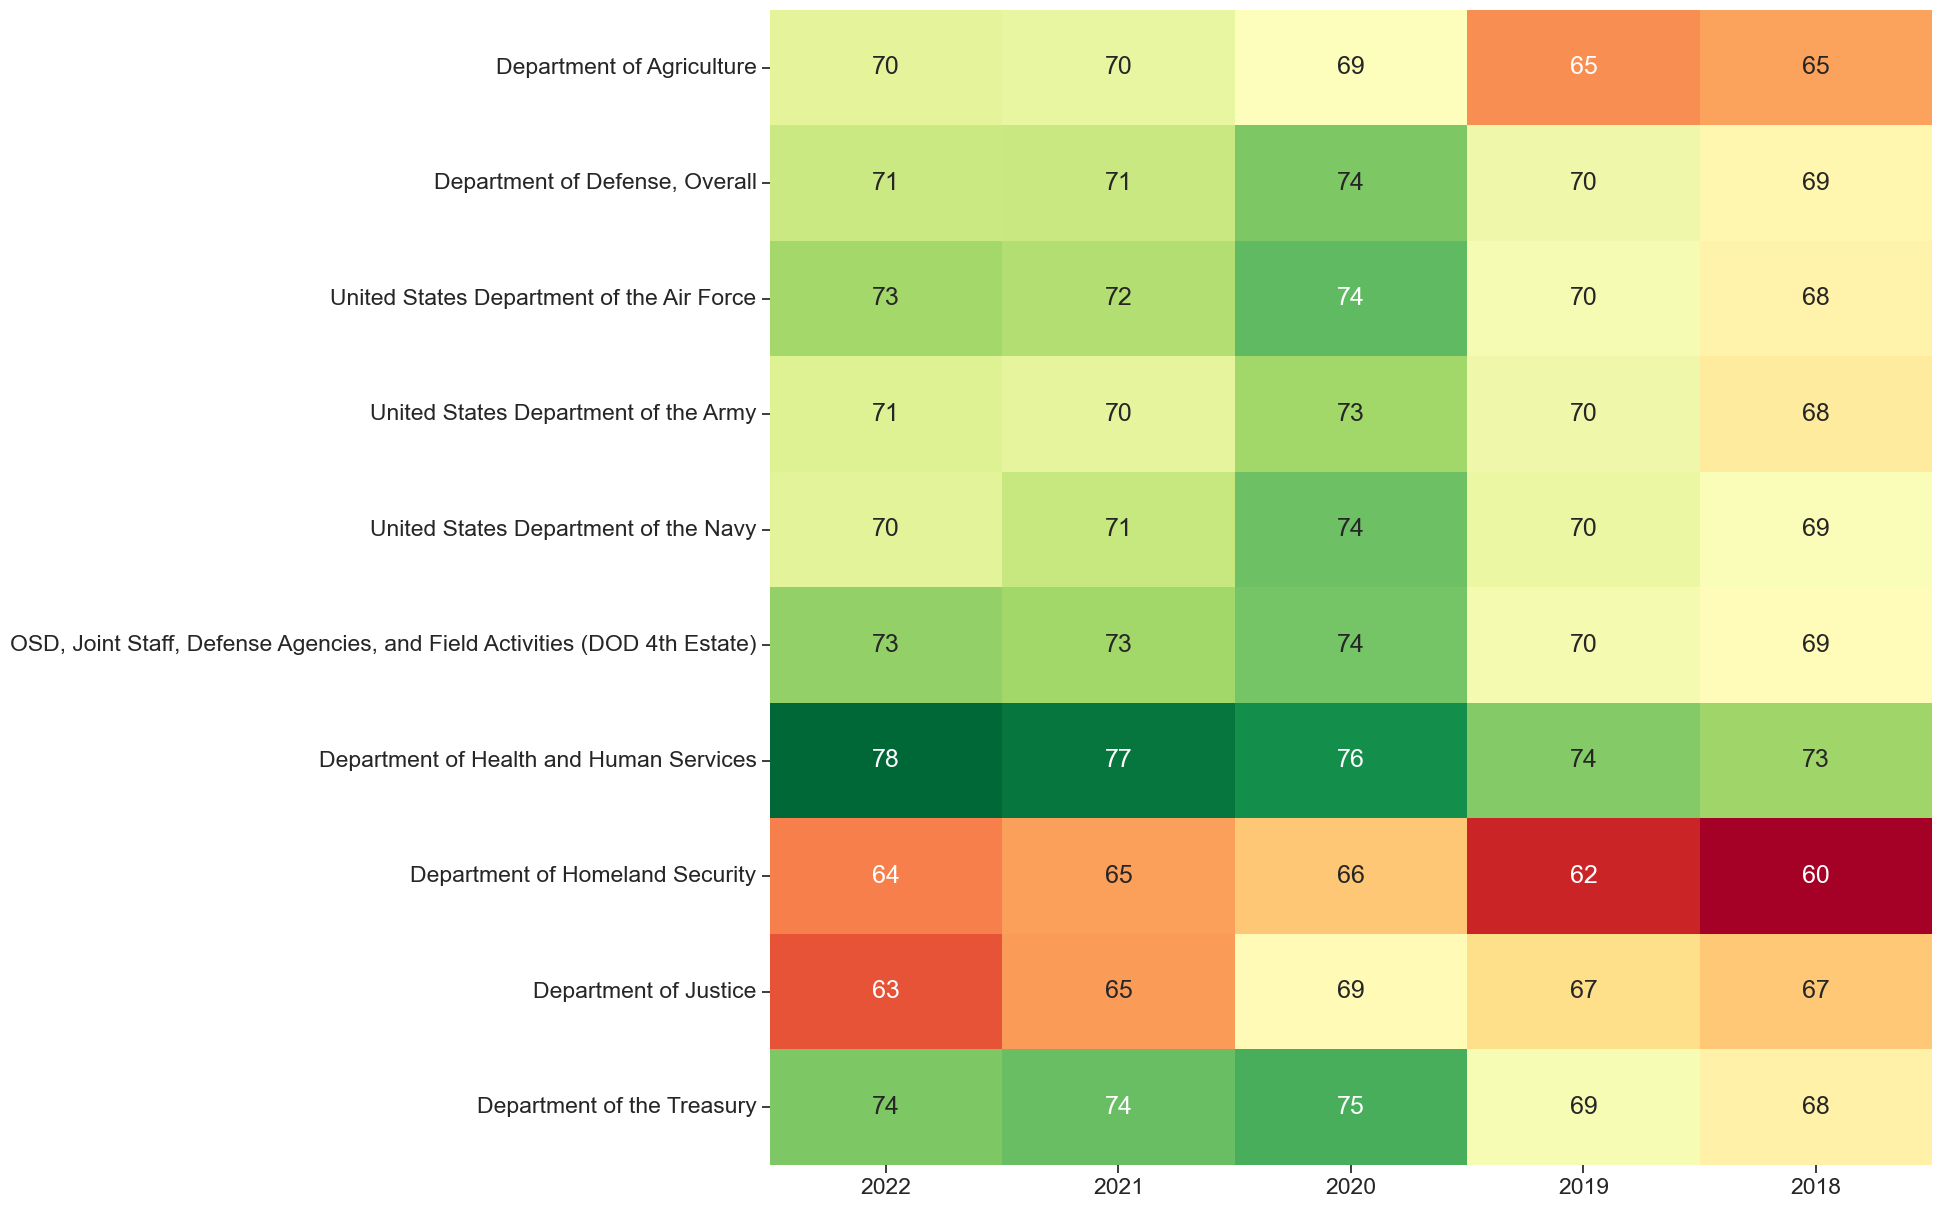

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi=100)
sns.set(font_scale=1.5)
sns.heatmap(eei[eei["Agency Size"] == "Very Large"].set_index("Agency Name").drop(columns=["Agency Size"]).astype(float),
            cmap="RdYlGn",
            yticklabels=True,
            cbar=False,
            annot=True,
            ax=ax);

plt.tick_params(axis='both', left=True,
                             labelleft=True,
                             top=False,
                             labeltop=False,
                             right=False,
                             labelright=False,
                             bottom=True,
                             labelbottom=True
                             )

plt.ylabel("");

##### Small

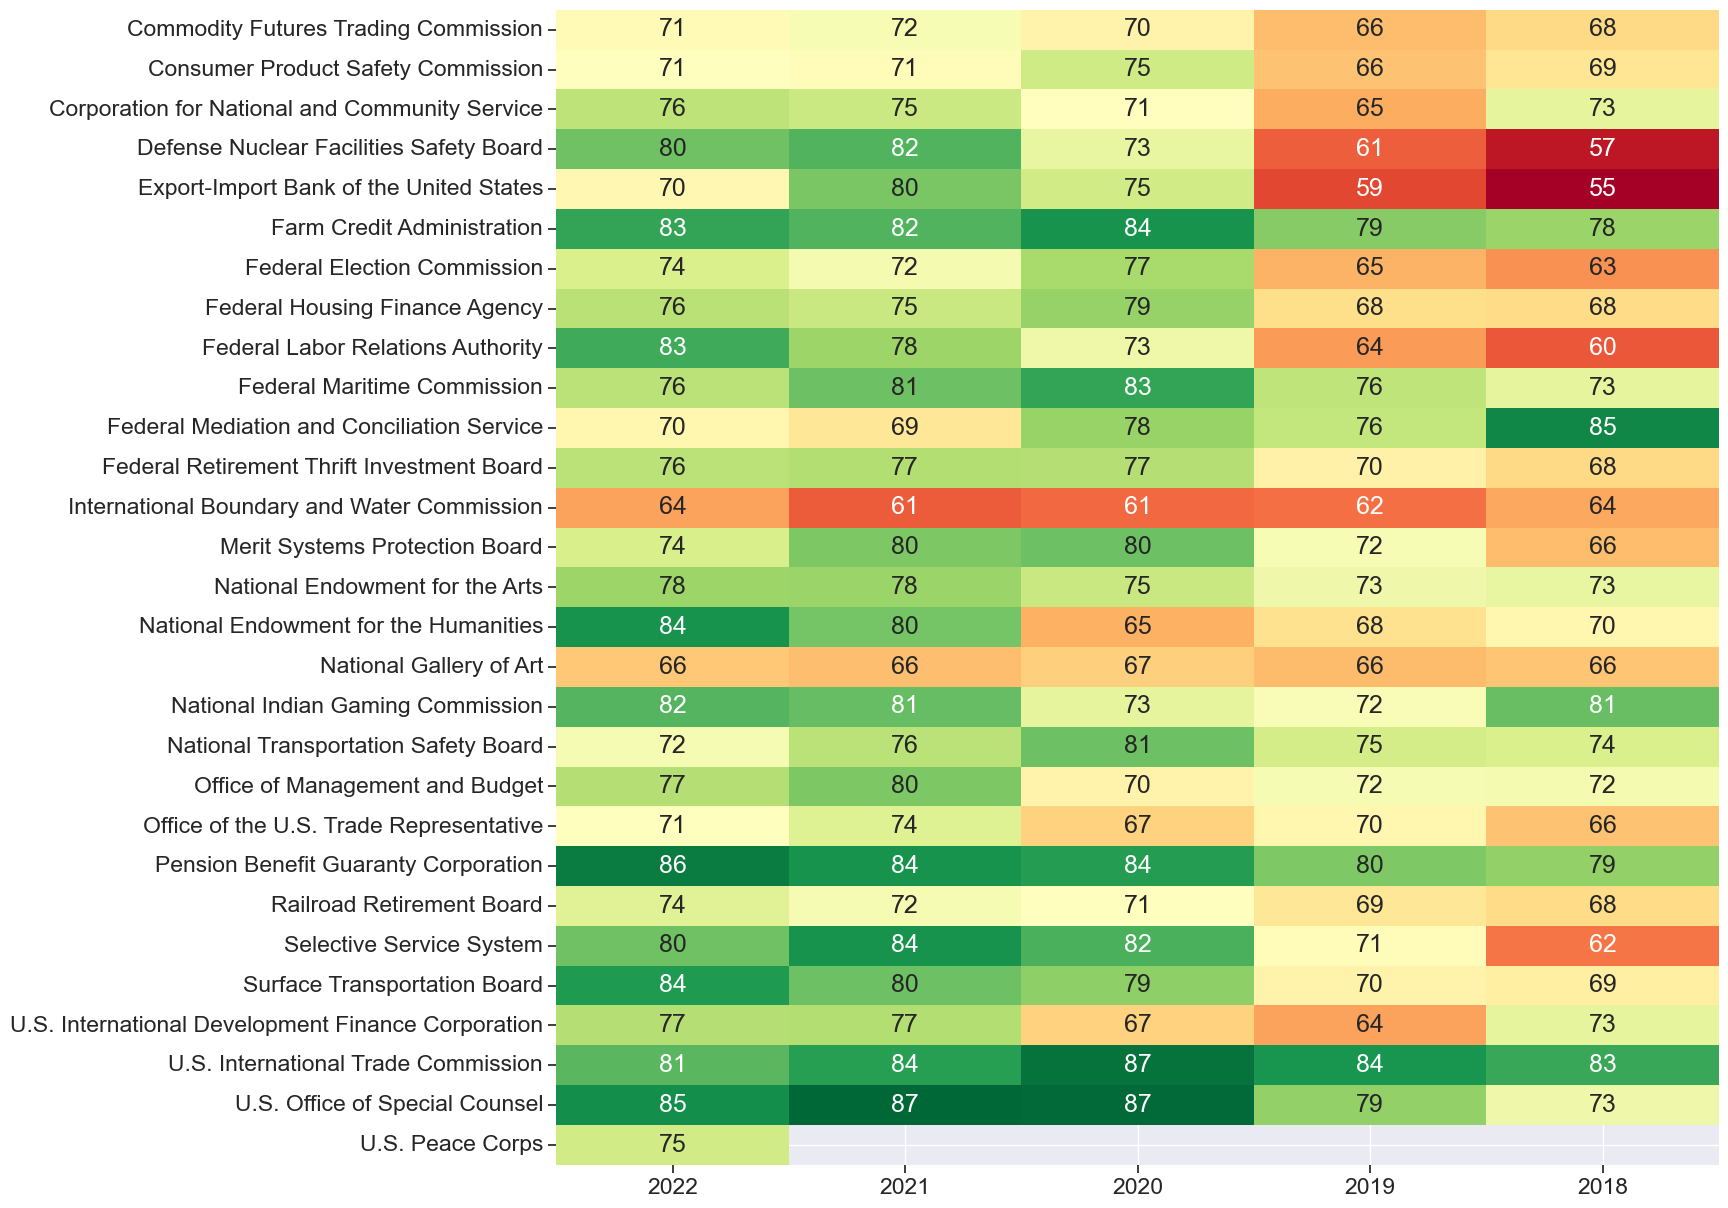

In [38]:
fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi=100)
sns.set(font_scale=1.5)
sns.heatmap(eei[eei["Agency Size"] == "Small"].set_index("Agency Name").drop(columns=["Agency Size"]).astype(float), cmap="RdYlGn", yticklabels=True, cbar=False, annot=True, ax=ax);

plt.tick_params(axis='both', left=True,
                             labelleft=True,
                             top=False,
                             labeltop=False,
                             right=False,
                             labelright=False,
                             bottom=True,
                             labelbottom=True
                             )

plt.ylabel("");

In [39]:
eei[eei[2022] < 70]["Agency Size"].value_counts().reset_index()

,Agency Size,count
0,Very Small,9
1,Very Large,2
2,Medium,2
3,Small,2
4,Large,1


### Global Satisfaction Index
- Combination of employees’ satisfaction with their job
    - their pay
    - their organization
    - their willingness to recommend their organization as a good place to work

In [40]:
gsi_job = pd.read_excel(PATH + "Global Satisfaction Index Results.xlsx",sheet_name="GS - Job Satisfaction")
gsi_job.replace("--", np.nan,inplace=True)
gsi_job.replace("N<10", 10,inplace=True)
gsi_job = gsi_job[~gsi_job["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [41]:
gsi_pay = pd.read_excel(PATH + "Global Satisfaction Index Results.xlsx",sheet_name="GS - Pay Satisfaction")
gsi_pay.replace("--", np.nan,inplace=True)
gsi_pay.replace("N<10", 10,inplace=True)
gsi_pay = gsi_pay[~gsi_pay["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [42]:
gsi_org = pd.read_excel(PATH + "Global Satisfaction Index Results.xlsx",sheet_name="GS - Organization Satisfaction")
gsi_org.replace("--", np.nan,inplace=True)
gsi_org.replace("N<10", 10,inplace=True)
gsi_org = gsi_org[~gsi_org["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [43]:
gsi_reco = pd.read_excel(PATH + "Global Satisfaction Index Results.xlsx",sheet_name="GS - Recommend Organization")
gsi_reco.replace("--", np.nan,inplace=True)
gsi_reco.replace("N<10", 10,inplace=True)
gsi_reco = gsi_reco[~gsi_reco["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Performance Confidence Index
- Employees in my work unit meet the needs of our customers
- Employees in my work unit contribute positively to my agency’s performance
- Employees in my work unit produce high-quality work
- Employees in my work unit adapt to changing priorities
- Employees in my work unit achieve our goals

In [44]:
pci = pd.read_excel(PATH + "Performance Confidence Index Results.xlsx",sheet_name="PC - Overall")
pci.replace("--", np.nan,inplace=True)
pci.replace("N<10", 10,inplace=True)
pci = pci[~pci["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


DEIA Index
- Diversity
- Equity
- Inclusion
- Accessibility

In [45]:
deia_diverse = pd.read_excel(PATH + "DEIA Index Results.xlsx",sheet_name="DEIA - Diversity")
deia_diverse.replace("--", np.nan,inplace=True)
deia_diverse.replace("N<10", 10,inplace=True)
deia_diverse = deia_diverse[~deia_diverse["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [46]:
deia_equity = pd.read_excel(PATH + "DEIA Index Results.xlsx",sheet_name="DEIA - Equity")
deia_equity.replace("--", np.nan,inplace=True)
deia_equity.replace("N<10", 10,inplace=True)
deia_equity = deia_equity[~deia_equity["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [47]:
deia_inclusion = pd.read_excel(PATH + "DEIA Index Results.xlsx",sheet_name="DEIA - Inclusion")
deia_inclusion.replace("--", np.nan,inplace=True)
deia_inclusion.replace("N<10", 10,inplace=True)
deia_inclusion = deia_inclusion[~deia_inclusion["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [48]:
deia_access = pd.read_excel(PATH + "DEIA Index Results.xlsx",sheet_name="DEIA - Accessibility")
deia_access.replace("--", np.nan,inplace=True)
deia_access.replace("N<10", 10,inplace=True)
deia_access = deia_access[~deia_access["Agency Size"].isnull()].reset_index(drop=True)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Combining 2022 Data

In [49]:
combined_2022 = \
eei[["Agency Name", "Agency Size", 2022]].merge(eei_iwe[["Agency Name", 2022]], on="Agency Name", suffixes=("", "_IWE"))

combined_2022 = \
combined_2022.merge(gsi_job[["Agency Name", "Percentage_2022"]], on="Agency Name", suffixes=("", "_JOB"))

combined_2022 = \
combined_2022.merge(gsi_pay[["Agency Name", "Percentage_2022"]], on="Agency Name", suffixes=("", "_PAY"))

combined_2022 = \
combined_2022.merge(gsi_org[["Agency Name", "Percentage_2022"]], on="Agency Name", suffixes=("", "_ORG"))

combined_2022 = \
combined_2022.merge(gsi_reco[["Agency Name", "Percentage_2022"]], on="Agency Name", suffixes=("", "_RECO"))

combined_2022 = \
combined_2022.merge(pci[["Agency Name", "Percentage_2022"]], on="Agency Name", suffixes=("", "_PCI"))

combined_2022 = \
combined_2022.merge(deia_diverse[["Agency Name", "Percentage_2022"]], on="Agency Name", suffixes=("", "_Diverse"))

combined_2022 = \
combined_2022.merge(deia_equity[["Agency Name", "Percentage_2022"]], on="Agency Name", suffixes=("", "_Equity"))

combined_2022 = \
combined_2022.merge(deia_inclusion[["Agency Name", "Percentage_2022"]], on="Agency Name", suffixes=("", "_Inclusion"))

combined_2022 = \
combined_2022.merge(deia_access[["Agency Name", "Percentage_2022"]], on="Agency Name", suffixes=("", "_Access"))

col_names = {"2022": "Employee_Engagement",
             "Agency Size": "Agency_Size",
             "2022_IWE": "Intrinsic_Work_Exp",
             "Percentage_2022": "Job_Satisfaction",
             "Percentage_2022_PAY": "Pay_Satisfaction",
             "Percentage_2022_ORG": "Organization_Satisfaction",
             "Percentage_2022_RECO": "Recommend_Organization",
             "Percentage_2022_PCI": "Perfromance_Confidence",
             "Percentage_2022_Diverse": "Diversity",
             "Percentage_2022_Equity": "Equity",
             "Percentage_2022_Inclusion": "Inclusion",
             "Percentage_2022_Access": "Accessibility"
            }
combined_2022.rename(columns=col_names, inplace=True)

combined_2022.head()

,Agency Name,Agency_Size,Employee_Engagement,Intrinsic_Work_Exp,Job_Satisfaction,Pay_Satisfaction,Organization_Satisfaction,Recommend_Organization,Perfromance_Confidence,Diversity,Equity,Inclusion,Accessibility
0,Department of Agriculture,Very Large,70.316418,72.669560,65.415301,48.202662,57.277250,64.511347,83.837384,74.934594,66.935080,75.913588,67.961141
1,"Department of Defense, Overall",Very Large,71.328197,73.975015,66.884464,57.253102,60.911161,64.851693,83.982935,69.558212,65.244348,75.024232,68.192977
2,United States Department of the Air Force,Very Large,72.591374,74.719912,67.872398,55.726441,62.790680,65.700285,83.485731,70.832475,66.295451,75.015106,69.256429
3,United States Department of the Army,Very Large,70.573399,73.981744,67.153384,57.764152,60.825784,64.285503,83.677071,68.506654,63.409909,74.437770,68.451336
4,United States Department of the Navy,Very Large,70.368539,72.974072,64.682961,55.208895,57.921983,63.659251,84.125095,68.719337,65.218357,75.062881,66.111635


<Axes: >

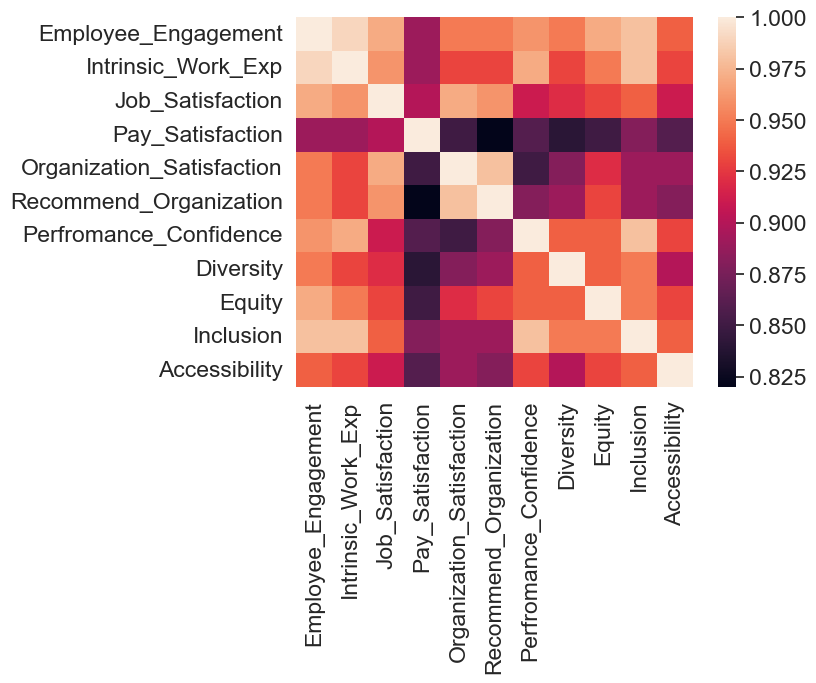

In [50]:
sns.heatmap(combined_2022.drop(columns={"Agency_Size"}).set_index("Agency Name").corr().round(2))

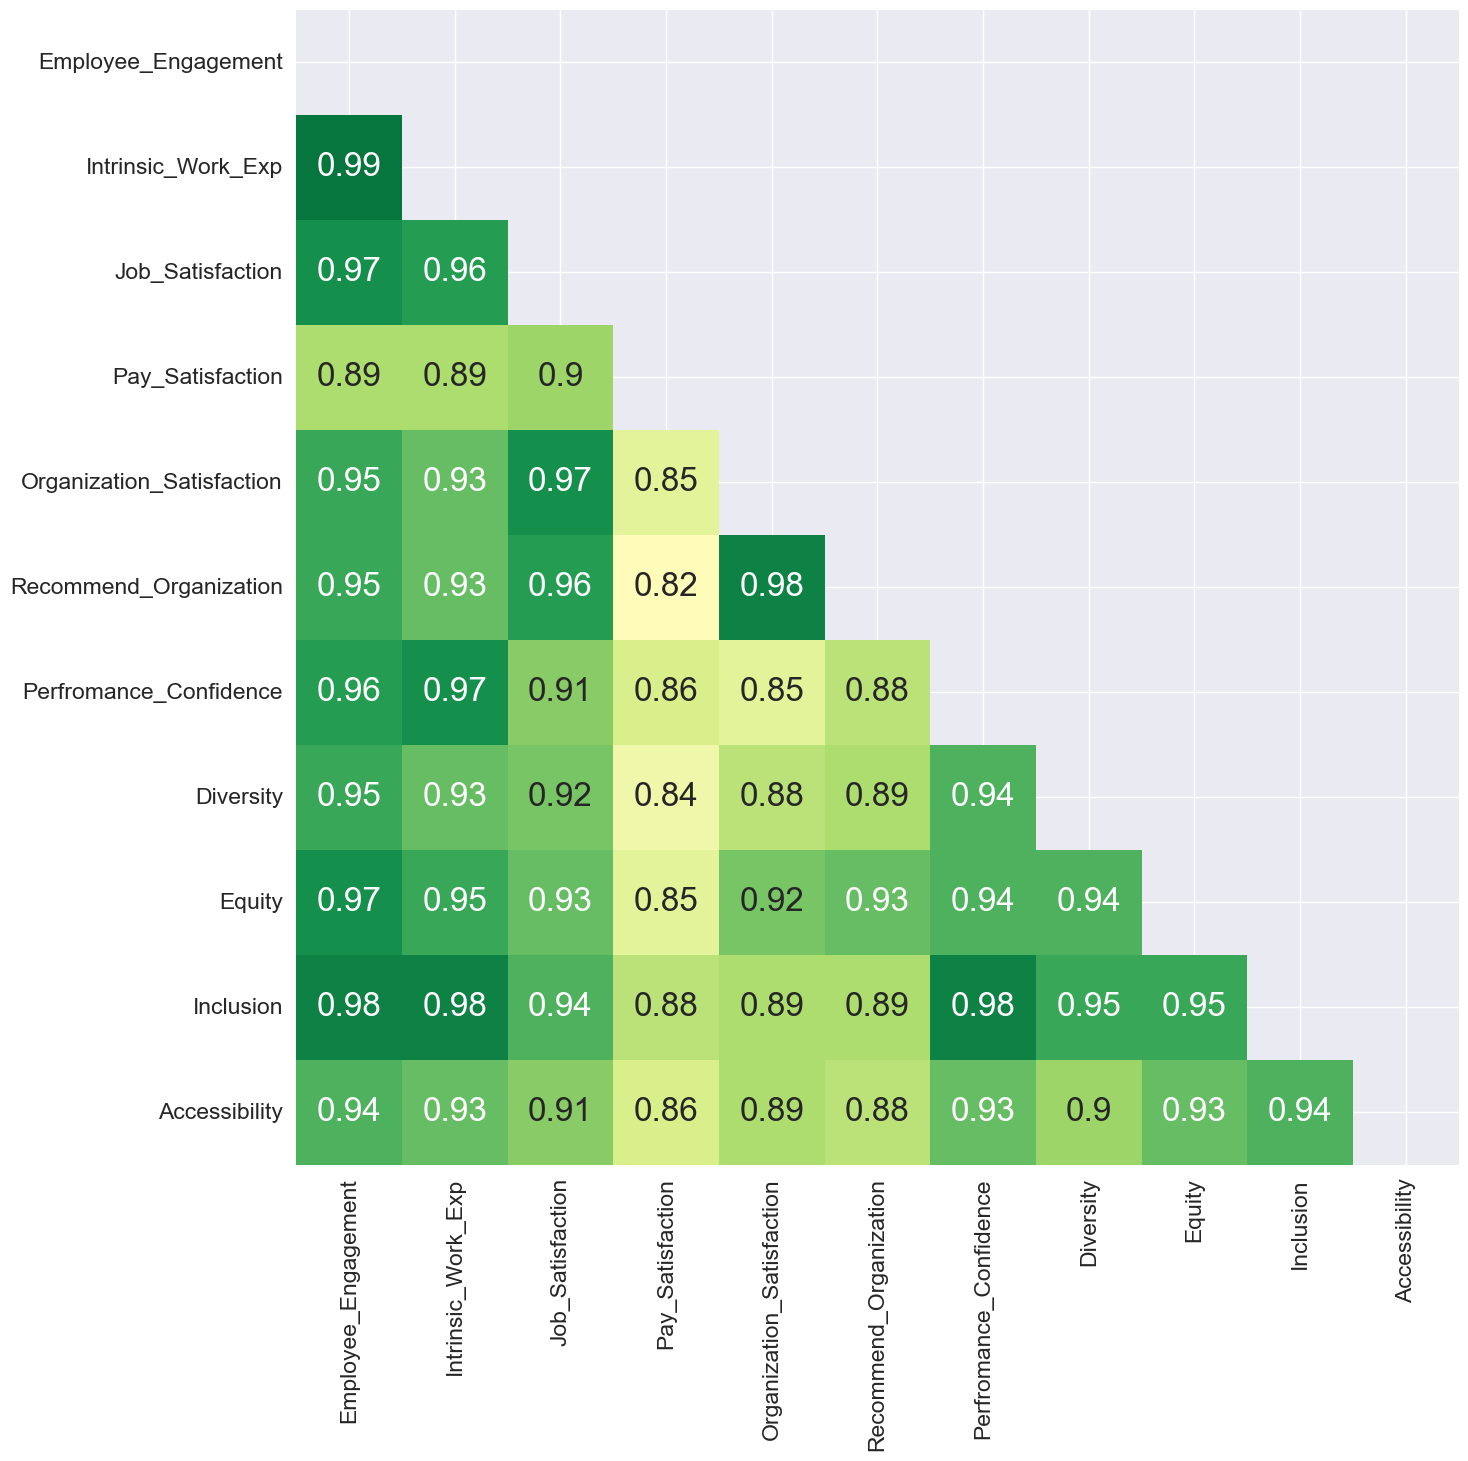

In [51]:
fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi=100)
sns.set(font_scale=2)

corr= combined_2022.drop(columns={"Agency_Size"}).set_index("Agency Name").corr().round(2)

matrix = np.triu(np.ones_like(corr))

sns.heatmap(corr, annot=True, mask=matrix, cbar=False, cmap="RdYlGn", vmin=0.65 , vmax=1);

### Using Linear Regression

In [52]:
combined_2022["Agency_Size"].value_counts()

Agency_Size
Small         29
Very Small    20
Medium        16
Very Large    10
Large          9
Name: count, dtype: int64

In [53]:
combined_2022["Agency_Size"] = \
combined_2022["Agency_Size"].map({"Very Large": 5,
                                  "Large": 4,
                                  "Medium": 3,
                                  "Small": 2,
                                  "Very Small": 1})

In [54]:
combined_2022.head()

,Agency Name,Agency_Size,Employee_Engagement,Intrinsic_Work_Exp,Job_Satisfaction,Pay_Satisfaction,Organization_Satisfaction,Recommend_Organization,Perfromance_Confidence,Diversity,Equity,Inclusion,Accessibility
0,Department of Agriculture,5,70.316418,72.669560,65.415301,48.202662,57.277250,64.511347,83.837384,74.934594,66.935080,75.913588,67.961141
1,"Department of Defense, Overall",5,71.328197,73.975015,66.884464,57.253102,60.911161,64.851693,83.982935,69.558212,65.244348,75.024232,68.192977
2,United States Department of the Air Force,5,72.591374,74.719912,67.872398,55.726441,62.790680,65.700285,83.485731,70.832475,66.295451,75.015106,69.256429
3,United States Department of the Army,5,70.573399,73.981744,67.153384,57.764152,60.825784,64.285503,83.677071,68.506654,63.409909,74.437770,68.451336
4,United States Department of the Navy,5,70.368539,72.974072,64.682961,55.208895,57.921983,63.659251,84.125095,68.719337,65.218357,75.062881,66.111635


In [55]:
y = combined_2022[["Employee_Engagement"]]
X = combined_2022.drop(columns=["Agency Name", "Employee_Engagement"])

In [56]:
model = LinearRegression(n_jobs = 10)

In [57]:
model.fit(X, y)

LinearRegression(n_jobs=10)

In [58]:
model.score(X, y)

0.9927295450078685

In [59]:
pd.DataFrame(model.coef_, columns= X.columns).T.sort_values(by=0, ascending=False).rename(columns={0:"Coefficient"})

,Coefficient
Intrinsic_Work_Exp,0.359432
Organization_Satisfaction,0.258538
Inclusion,0.218775
Equity,0.098792
Diversity,0.096744
Agency_Size,0.033241
Accessibility,0.026977
Job_Satisfaction,-0.006200
Pay_Satisfaction,-0.008503
Perfromance_Confidence,-0.013564


In [60]:
X

,Agency_Size,Intrinsic_Work_Exp,Job_Satisfaction,Pay_Satisfaction,Organization_Satisfaction,Recommend_Organization,Perfromance_Confidence,Diversity,Equity,Inclusion,Accessibility
0,5,72.669560,65.415301,48.202662,57.277250,64.511347,83.837384,74.934594,66.935080,75.913588,67.961141
1,5,73.975015,66.884464,57.253102,60.911161,64.851693,83.982935,69.558212,65.244348,75.024232,68.192977
2,5,74.719912,67.872398,55.726441,62.790680,65.700285,83.485731,70.832475,66.295451,75.015106,69.256429
3,5,73.981744,67.153384,57.764152,60.825784,64.285503,83.677071,68.506654,63.409909,74.437770,68.451336
4,5,72.974072,64.682961,55.208895,57.921983,63.659251,84.125095,68.719337,65.218357,75.062881,66.111635
...,...,...,...,...,...,...,...,...,...,...,...
79,1,86.290208,76.333614,68.150964,78.516991,87.397363,93.008062,87.391298,84.209240,81.723815,88.910573
80,1,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
81,1,43.466425,29.632596,43.531082,12.301551,17.252073,72.157643,60.720021,36.546796,55.232651,59.451375
82,1,82.668492,75.288839,63.420713,76.245045,82.165044,92.686125,86.166714,81.958148,83.728712,94.117840


In [61]:
combined_2022[combined_2022["Agency_Size"] == 1]

,Agency Name,Agency_Size,Employee_Engagement,Intrinsic_Work_Exp,Job_Satisfaction,Pay_Satisfaction,Organization_Satisfaction,Recommend_Organization,Perfromance_Confidence,Diversity,Equity,Inclusion,Accessibility
64,AbilityOne Commission,1,67.458301,59.987347,65.798708,62.720532,60.435160,48.565267,70.527984,66.791176,55.486662,75.971247,75.953111
65,Advisory Council on Historic Preservation,1,81.981347,81.903507,75.507152,63.107493,76.648875,88.167664,100.000000,72.170635,81.524544,80.658867,89.001999
66,American Battle Monuments Commission,1,64.354386,74.225960,58.941268,67.326529,53.911542,54.573449,90.918846,56.543376,66.251424,73.022416,60.212464
67,Commission on Civil Rights,1,75.209402,79.622249,71.803437,70.778801,71.803437,60.616646,88.714703,68.709619,67.355439,87.502791,89.809820
68,Farm Credit System Insurance Corporation,1,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
69,Federal Mine Safety and Health Review Commission,1,72.959066,85.458039,56.809500,59.025034,52.530805,60.450718,90.558293,61.240544,56.659917,77.175129,70.201896
70,Institute of Museum and Library Services,1,80.696360,84.914291,78.792787,69.905334,79.533599,85.430674,95.334101,89.283789,75.128475,80.740435,61.779897
71,Inter-American Foundation,1,77.976529,81.155206,69.254918,58.706044,67.116926,68.109592,96.174173,58.113757,74.213611,82.080243,86.784363
72,John F. Kennedy Center for the Performing Arts,1,53.228840,54.969569,42.622835,46.867678,29.550763,39.980289,75.645903,60.912729,54.739835,65.414856,46.043989
73,Marine Mammal Commission,1,95.797180,93.039999,90.585904,90.585904,90.585904,90.585904,92.939428,89.972011,100.000000,89.568397,87.246006


In [62]:
combined_2022[combined_2022["Agency_Size"] == 2].shape

(29, 13)

In [63]:
((combined_2022[combined_2022["Agency_Size"] == 2].drop(columns={"Agency_Size"}).set_index("Agency Name") > 70).sum() / 29).reset_index().sort_values(by=0)

,index,0
3,Pay_Satisfaction,0.310345
4,Organization_Satisfaction,0.379310
5,Recommend_Organization,0.551724
2,Job_Satisfaction,0.620690
8,Equity,0.724138
10,Accessibility,0.862069
7,Diversity,0.896552
0,Employee_Engagement,0.931034
1,Intrinsic_Work_Exp,0.965517
9,Inclusion,0.965517


In [75]:
pd.merge(combined_2022[["Agency Name", "Agency_Size"]], (combined_2022.drop(columns=["Agency Name", "Agency_Size"]) >= 70) * 1, left_index=True, right_index=True)

,Agency Name,Agency_Size,Employee_Engagement,Intrinsic_Work_Exp,Job_Satisfaction,Pay_Satisfaction,Organization_Satisfaction,Recommend_Organization,Perfromance_Confidence,Diversity,Equity,Inclusion,Accessibility
0,Department of Agriculture,5,1,1,0,0,0,0,1,1,0,1,0
1,"Department of Defense, Overall",5,1,1,0,0,0,0,1,0,0,1,0
2,United States Department of the Air Force,5,1,1,0,0,0,0,1,1,0,1,0
3,United States Department of the Army,5,1,1,0,0,0,0,1,0,0,1,0
4,United States Department of the Navy,5,1,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Postal Regulatory Commission,1,1,1,1,0,1,1,1,1,1,1,1
80,U.S. Access Board,1,0,0,0,0,0,0,0,0,0,0,0
81,U.S. Chemical Safety and Hazard Investigation ...,1,0,0,0,0,0,0,1,0,0,0,0
82,U.S. Office of Government Ethics,1,1,1,1,0,1,1,1,1,1,1,1


In [77]:
pd.merge(combined_2022[["Agency Name", "Agency_Size"]], (combined_2022.drop(columns=["Agency Name", "Agency_Size"]) >= 70) * 1, left_index=True, right_index=True).to_csv("asd.csv")

In [89]:
combined_2022.drop(columns=["Agency Name"]).groupby(["Agency_Size"]).mean().T

Agency_Size,1,2,3,4,5
Employee_Engagement,60.065132,76.517177,75.741618,74.056793,70.725906
Intrinsic_Work_Exp,61.094036,78.384689,76.964808,75.501585,72.902719
Job_Satisfaction,54.642727,72.868551,71.940919,70.148903,66.436318
Pay_Satisfaction,50.787701,64.670373,61.542242,60.269441,55.710159
Organization_Satisfaction,52.581499,68.868794,67.287613,65.981499,60.355827
Recommend_Organization,54.684814,71.713581,69.626010,70.609595,64.676630
Perfromance_Confidence,70.189747,91.264619,89.476747,87.213435,83.519151
Diversity,58.107795,76.002770,76.542087,73.886275,70.691597
Equity,56.373863,72.368460,70.823521,69.600077,65.404489
Inclusion,62.865088,81.313633,80.184122,77.924561,74.797153
